<h1>THE SPARKS FOUNDATION DATA SCIENCE & BUSINESS ANALYTICS INTERNSHIP</h1>

<h2>Name: Manasvi Rajaram Patil</h2>
<h2>Grip April Batch 2024</h2>

<h3>TASK 02:Prediction Using Unsupervised Learning</h3>

<h3>Importing the libraries</h3>

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns 

<h3>Load the data</h3>

In [4]:
data = pd.read_csv("Iris.csv")

In [3]:
data.head(8)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa


In [6]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<h3>Removing null values </h3>

In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<h3>Preprocessing of the data</h3>

In [8]:
X = data.drop(columns=['Id', 'Species'])  # Drop non-numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h3>Determine the Clusters</h3>

In [15]:
# Define a range of cluster numbers to try
k_values = range(2, 11)
ssd = []
silhouette_scores = []

In [24]:
import warnings
warnings.filterwarnings("ignore")

silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

<h3>Plot Elbow Method</h3>

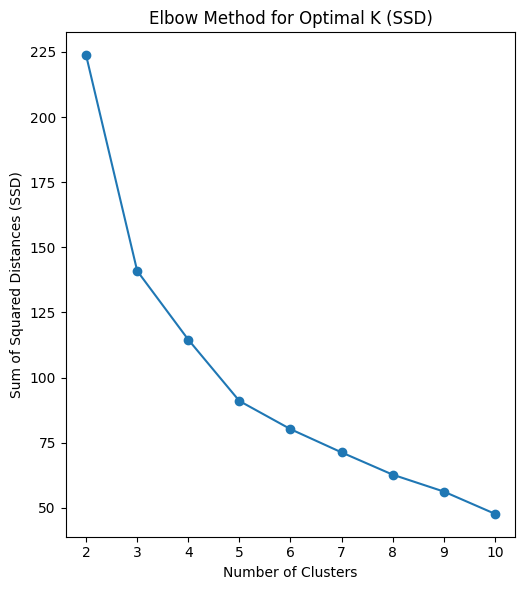

In [30]:
plt.figure(figsize=(10, 6))

# Plot SSD
plt.subplot(1, 2, 1)
plt.plot(k_values, ssd[:len(k_values)], marker='o')  # Ensure ssd array has the same length as k_values
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method for Optimal K (SSD)')
plt.tight_layout()
plt.show()

<h3>Plot Silhouette Analysis</h3>

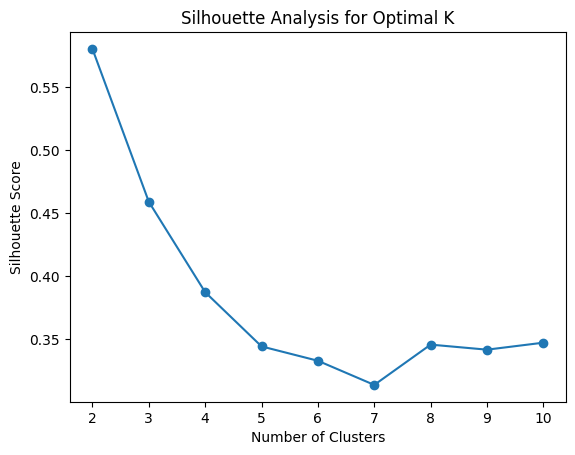

In [29]:
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

In [10]:
k = 3  # Predicted
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

C:\Users\Manasvi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Manasvi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<h3>Visualization</h3>

<h3>Centroid Plot</h3>

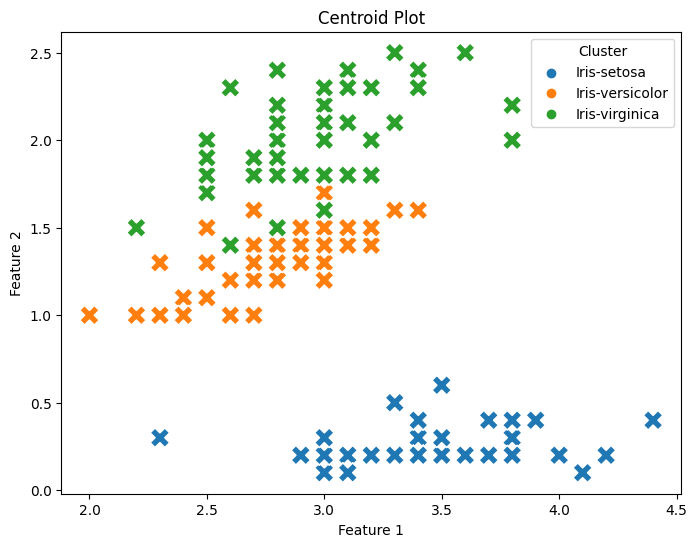

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SepalWidthCm', y='PetalWidthCm', data=data)
sns.scatterplot(x='SepalWidthCm', y='PetalWidthCm', hue='Species', data=data, s=200, marker='X')
plt.title('Centroid Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

<h3>Box Plot</h3>

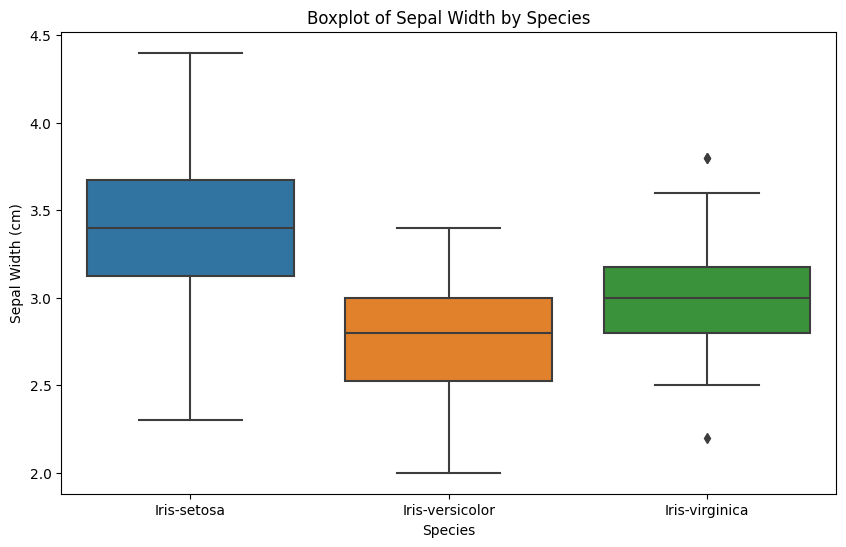

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='SepalWidthCm', data=data)
plt.title('Boxplot of Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.show()

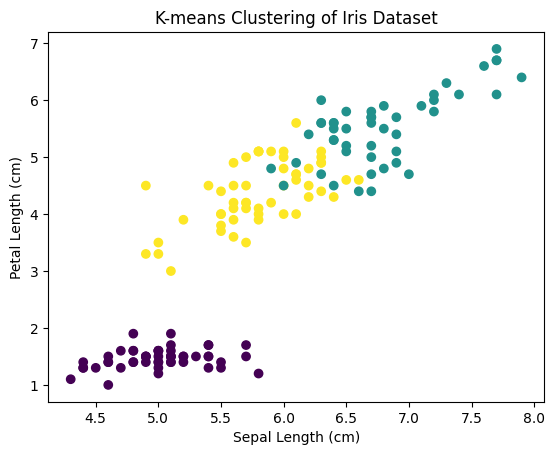

In [11]:
plt.scatter(X['SepalLengthCm'], X['PetalLengthCm'], c=clusters, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('K-means Clustering of Iris Dataset')
plt.show()

<h3>Conclusion</h3>

1. Conducted unsupervised learning analysis using the iris dataset.
2. Utilized plot elbow method and plot silhouette method for the analysis to    determine the optimal number of clusters, which was found to be 3.
3. Visualized the clusters using a centroid plot and a boxplot.
4. Identified distinct clusters based on sepal and petal measurements.
5. Observed significant differences in sepal widths among the different 
   species of iris flowers.
6. The analysis provides insights into the natural groupings present in the  
   iris dataset without relying on predefined labels.
7. Unsupervised learning techniques like K-means clustering enable the 
   exploration of underlying patterns and structures within data without the    need for labeled output.